In [3]:
import pandas as pd

# 파일 로드
customers_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/customers.csv')
locations_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/locations.csv')
order_items_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/order_items.csv')
orders_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/orders.csv')
payments_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/payments.csv')
products_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/products.csv')
reviews_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/reviews.csv')
sellers_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/sellers.csv')

# 각 파일의 상위 데이터와 정보 확인
data_summary = {
    "customers": customers_df.head(),
    "locations": locations_df.head(),
    "order_items": order_items_df.head(),
    "orders": orders_df.head(),
    "payments": payments_df.head(),
    "products": products_df.head(),
    "reviews": reviews_df.head(),
    "sellers": sellers_df.head()
}

data_summary


{'customers':       Customer_id     Customer_unique_id  Customer_zipcode_prefix  \
 0  CUSTOMER_00000  CUSTOMER_Unique_00000                    14409   
 1  CUSTOMER_00001  CUSTOMER_Unique_00001                     9790   
 2  CUSTOMER_00002  CUSTOMER_Unique_00002                     1151   
 3  CUSTOMER_00003  CUSTOMER_Unique_00003                     8775   
 4  CUSTOMER_00004  CUSTOMER_Unique_00004                    89254   
 
            Customer_city Customer_state  
 0                 franca             SP  
 1  sao bernardo do campo             SP  
 2              sao paulo             SP  
 3        mogi das cruzes             SP  
 4         jaragua do sul             SC  ,
 'locations':    Geolocation_zipcode_prefix  Geolocation_lat  Geolocation_lng  \
 0                        1037       -23.545621       -46.639292   
 1                        1046       -23.546081       -46.644820   
 2                        1046       -23.546129       -46.642951   
 3                   

In [6]:
# 고객 수 확인
customer_count = customers_df.shape[0]

# 고객 데이터셋의 기본 통계 정보 확인
customer_statistics = customers_df.describe()

(customer_count, customer_statistics)

(87955,
        Customer_zipcode_prefix
 count             87955.000000
 mean              35395.332716
 std               29858.374668
 min                1004.000000
 25%               11618.500000
 50%               24903.000000
 75%               59150.000000
 max               99980.000000)

고객은 총 87955명 이다

In [3]:
# 고유값의 개수 확인
unique_values = customers_df['Customer_city'].nunique()
print(f"고유 도시 개수: {unique_values}")

# 각 범주의 빈도 수 계산
value_counts = customers_df['Customer_city'].value_counts()
print(value_counts.head(20))


고유 도시 개수: 3976
Customer_city
sao paulo                13486
rio de janeiro            6018
belo horizonte            2459
brasilia                  1861
curitiba                  1352
campinas                  1277
porto alegre              1221
salvador                  1086
guarulhos                 1028
sao bernardo do campo      827
niteroi                    750
santo andre                702
osasco                     652
santos                     612
sao jose dos campos        609
goiania                    602
fortaleza                  571
sorocaba                   547
recife                     540
florianopolis              517
Name: count, dtype: int64


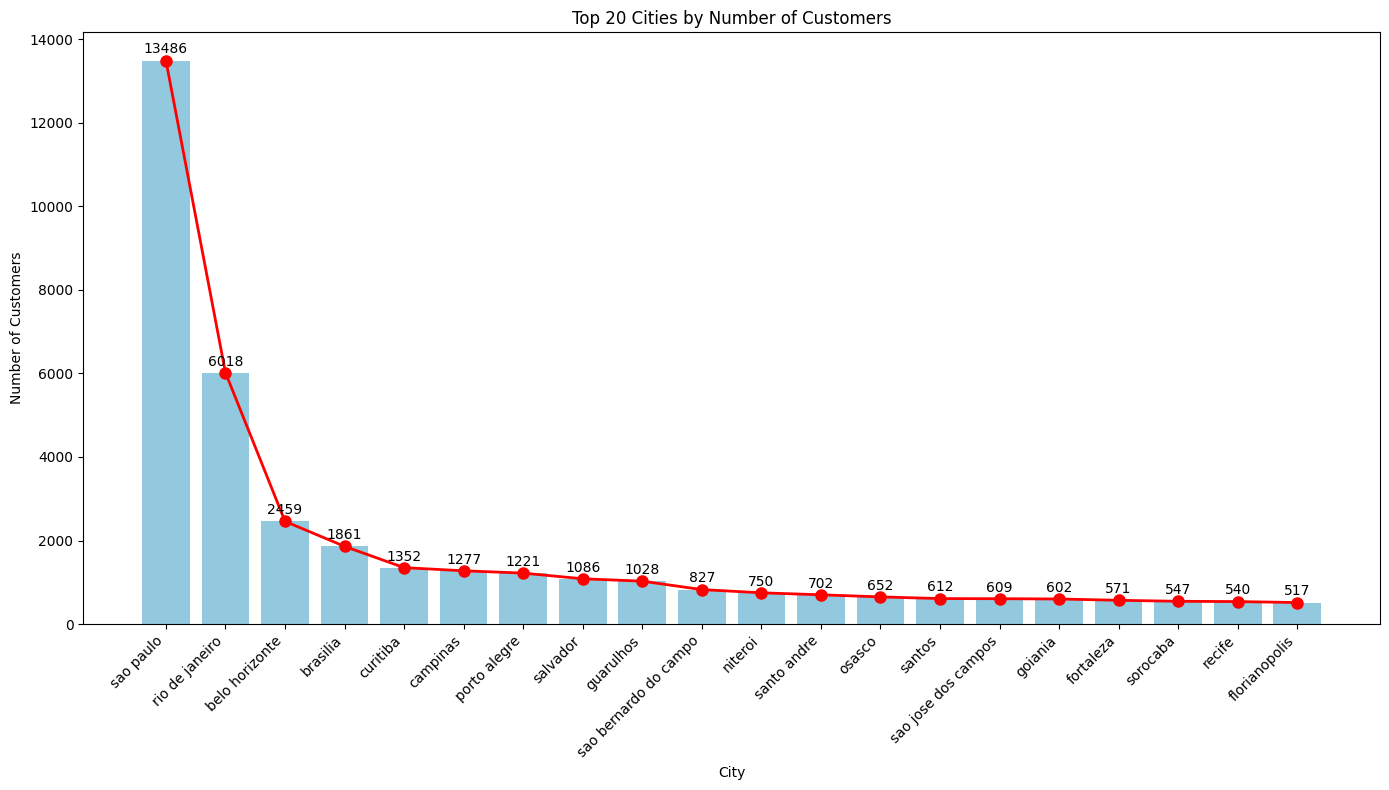

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Customer_city'의 상위 20개 도시의 고객 수 계산
top_cities = customers_df['Customer_city'].value_counts().head(20)

# 막대그래프로 시각화
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=top_cities.index, y=top_cities.values, color='skyblue')

# 각 막대 위에 빈도수 표시
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10, xytext = (0, 8), 
                   textcoords = 'offset points')

# 선 그래프 추가
plt.plot(top_cities.values, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)

plt.title('Top 20 Cities by Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.tight_layout()  # 그래프 간격 조정
plt.show()


가장 많은 소비자들이 있는 도시는 상 파울루이고 그다음은 리오데자네이로 나타났다. 그다음은 벨루오리존치 이고 이 3도시가 가장 많은 소비자들이 있는 도시로 나타났다. 

나머지 도시들에서는 큰 차이가 나타나지않았다.

In [20]:
# Price와 Freight_value에 대한 기술 통계 출력
order_items_descriptive_stats = order_items_df[['Price', 'Freight_value']].describe()
print(order_items_descriptive_stats)



               Price  Freight_value
count  100557.000000  100557.000000
mean      119.821386      19.765626
std       180.757135      15.358797
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.900000      16.160000
75%       133.900000      20.960000
max      6735.000000     409.680000


전체 물품은 100557개이며 , 물품평균가격은 1129.82달러이다.

In [24]:
# products 데이터에 카테고리 정보가 있으므로 order_items와 결합
order_items_with_category = pd.merge(order_items_df, products_df[['Product_id', 'Product_category_name']], on='Product_id', how='left')

# 상품 카테고리별 주문 수량 및 매출 집계
category_analysis = order_items_with_category.groupby('Product_category_name').agg(
    Total_Orders=pd.NamedAgg(column='Order_item_id', aggfunc='count'),
    Total_Revenue=pd.NamedAgg(column='Price', aggfunc='sum')
).reset_index()

# 결과 출력
print(category_analysis.sort_values(by='Total_Revenue', ascending=False))


        Product_category_name  Total_Orders  Total_Revenue
38              health_beauty          8378     1073280.45
71              watches_gifts          5275     1062966.23
8              bed_bath_table         10094      943580.26
64             sports_leisure          7799      887784.17
14      computers_accessories          7075      832695.93
..                        ...           ...            ...
42             home_comfort_2            29         747.37
54           musical_cds_dvds            14         730.00
4             arts_and_crafts            11         645.06
26  fashion_childrens_clothes             7         519.95
47     insurance_and_services             2         283.29

[72 rows x 3 columns]


C:\Users\82106\AppData\Local\Temp\ipykernel_25096\2930193738.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Revenue', y='Product_category_name', data=top_categories, palette='viridis')


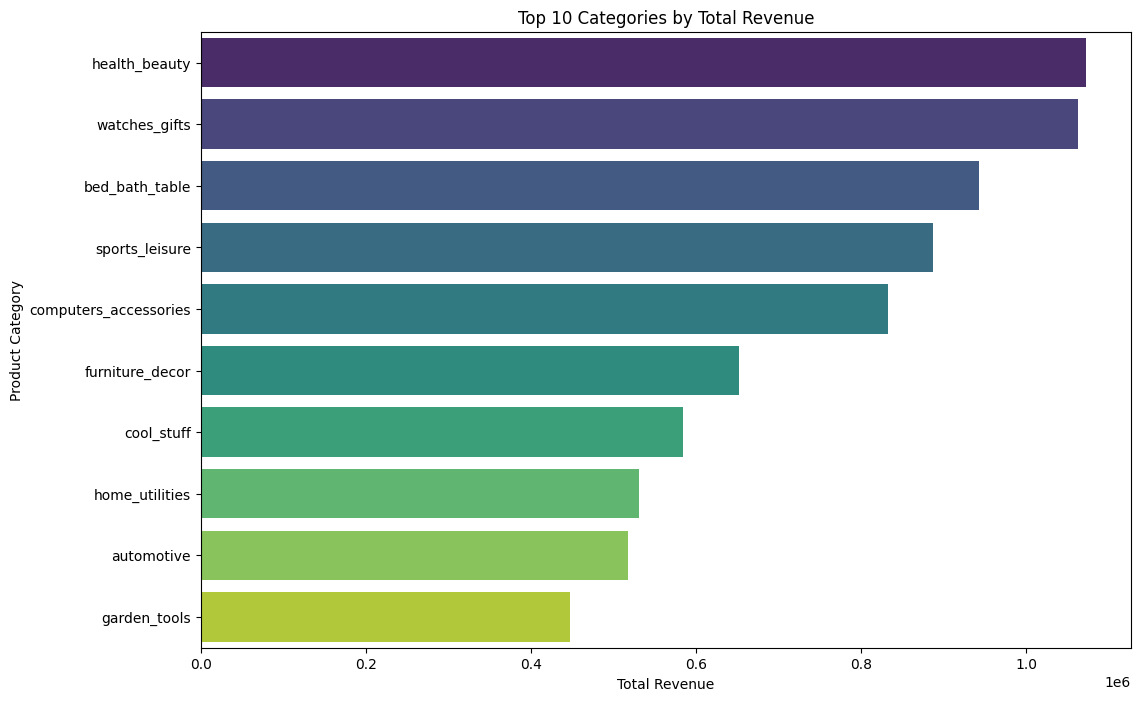

C:\Users\82106\AppData\Local\Temp\ipykernel_25096\2930193738.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Orders', y='Product_category_name', data=top_categories, palette='viridis')


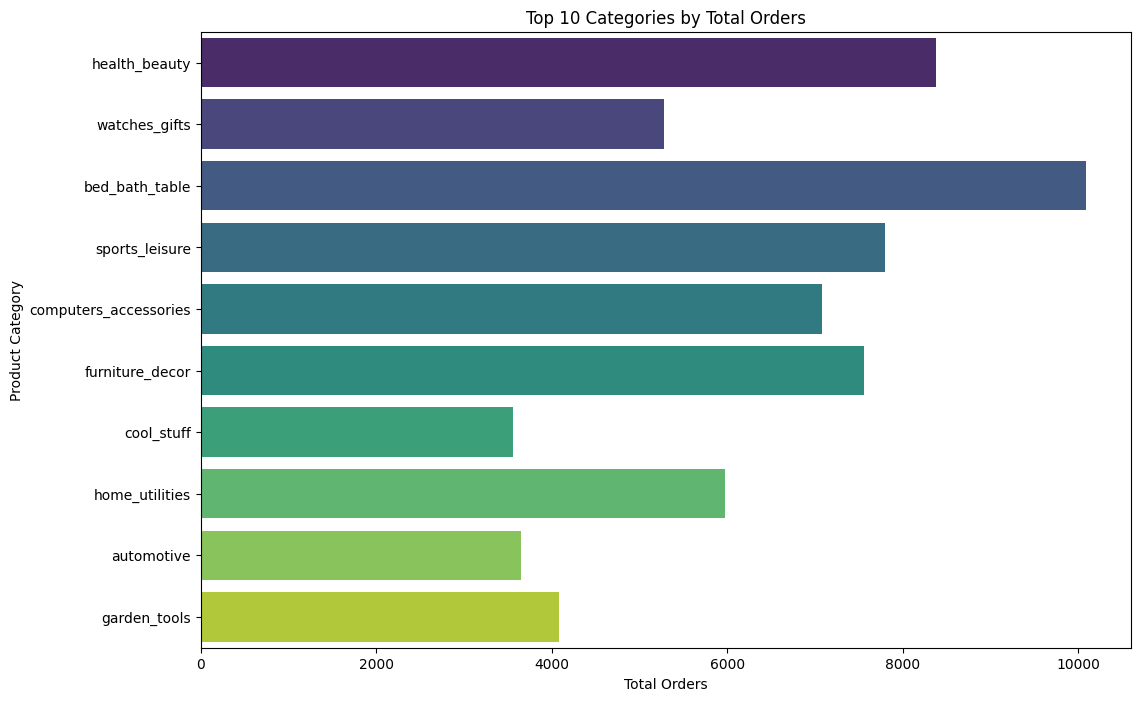

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 결과 정렬
category_analysis_sorted = category_analysis.sort_values(by='Total_Revenue', ascending=False)

# 시각화 설정
plt.figure(figsize=(12, 8))

# 상위 10개 카테고리에 대한 매출 시각화
top_categories = category_analysis_sorted.head(10)
sns.barplot(x='Total_Revenue', y='Product_category_name', data=top_categories, palette='viridis')
plt.title('Top 10 Categories by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')

# 그래프 보여주기
plt.show()

# 주문 수량 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Orders', y='Product_category_name', data=top_categories, palette='viridis')
plt.title('Top 10 Categories by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Product Category')

# 그래프 보여주기
plt.show()


매출순서가 꼭 주문수량과 일치하지는 않는다. 

특히 매출3위인 bed_bath_table 은 주문수량이 1위인것을 볼수있다.

C:\Users\82106\AppData\Local\Temp\ipykernel_25096\713688386.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Orders', y='Product_category_name', data=top_categories_orders, palette='mako')


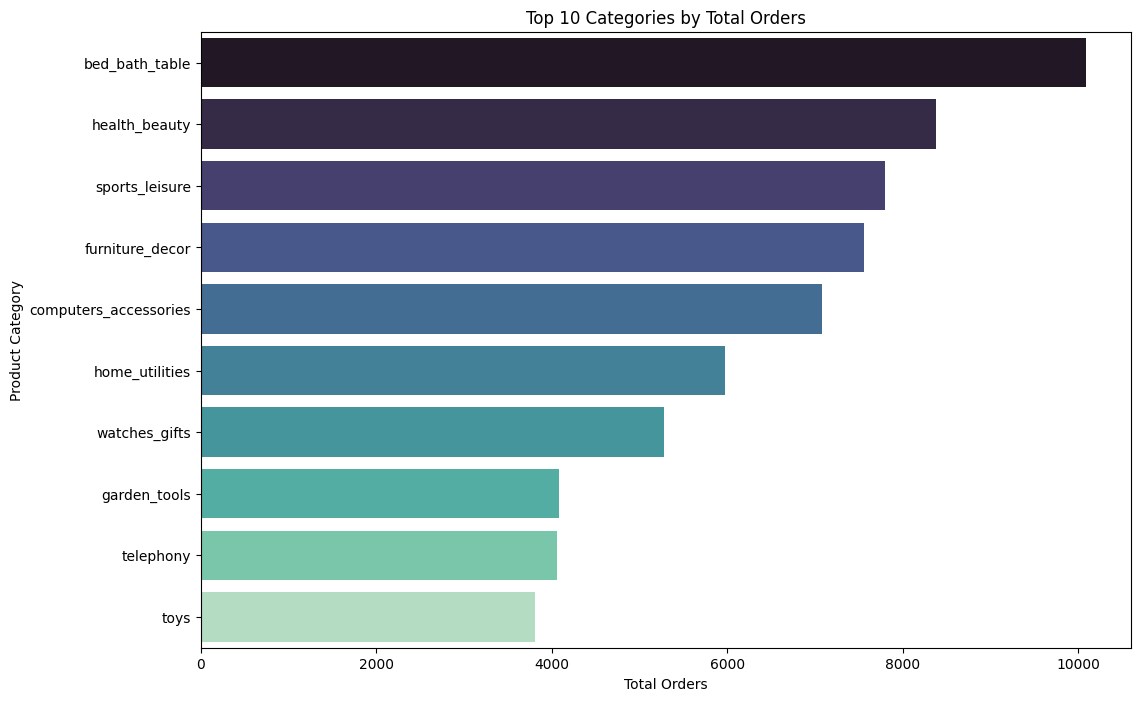

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 결합
order_items_with_category = pd.merge(order_items_df, products_df[['Product_id', 'Product_category_name']], on='Product_id', how='left')

# 상품 카테고리별 주문 수량 및 매출 집계
category_analysis = order_items_with_category.groupby('Product_category_name').agg(
    Total_Orders=pd.NamedAgg(column='Order_item_id', aggfunc='count'),
    Total_Revenue=pd.NamedAgg(column='Price', aggfunc='sum')
).reset_index()

# 결과 정렬
category_analysis_sorted_orders = category_analysis.sort_values(by='Total_Orders', ascending=False)

# 상위 10개 카테고리 시각화
top_categories_orders = category_analysis_sorted_orders.head(10)

# 주문 수량에 대한 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Orders', y='Product_category_name', data=top_categories_orders, palette='mako')
plt.title('Top 10 Categories by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Product Category')

# 그래프 보여주기
plt.show()


첫 번째 그래프에서는 health_beauty 카테고리가 가장 높은 총 매출을 보이고 있다. 

이는 이 카테고리의 상품이 높은 가격대를 가지거나, 매우 인기가 있어 많이 팔린다는 것을 의미할 수 있다.

다른 상위 카테고리로는 watches_gifts, bed_bath_table, sports_leisure, computers_accessories 등이 있으며, 이 카테고리들도 상당한 매출을 창출하고 있다.

두 번째 그래프에서는 bed_bath_table 카테고리가 가장 많은 주문 수를 기록하고 있다.

이는 해당 카테고리의 상품들이 대량으로 판매되고 있거나, 다양한 상품들이 고르게 판매되고 있다는 것을 시사한다.

health_beauty 카테고리는 매출에서는 1위였으나 주문 수에서는 2위를 차지하고 있다. 이는 해당 카테고리 상품의 단가가 높거나, 고가의 제품이 매출에 크게 기여하고 있음을 나타낼 수 있다.

주문 수에서 상위를 차지하는 다른 카테고리들은 sports_leisure, furniture_decor, computers_accessories로, 이들 카테고리는 상대적으로 저렴한 가격대의 상품이 많거나, 자주 구매되는 필수품일 가능성이 있다.

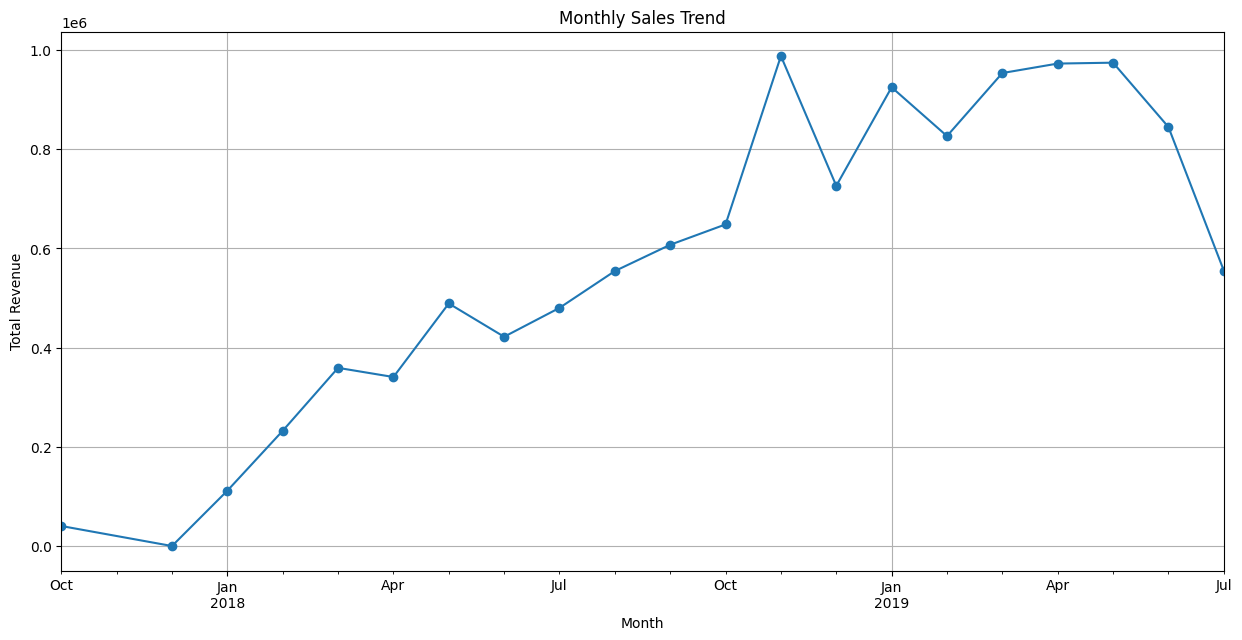

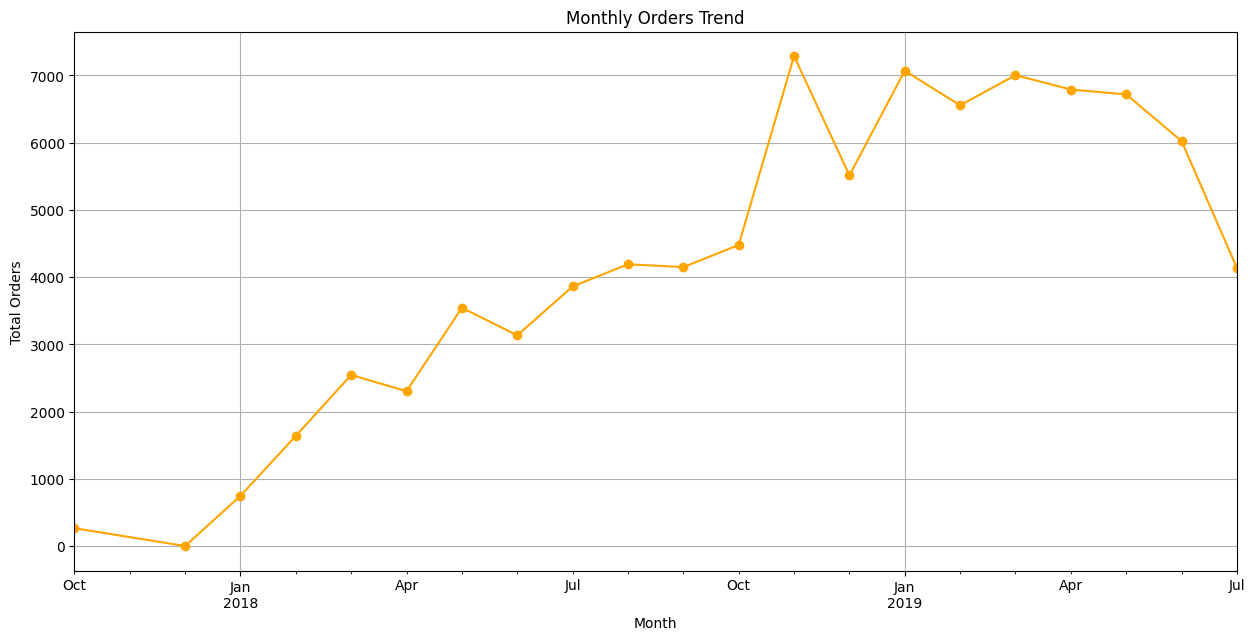

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 주문 데이터와 주문 아이템 데이터를 결합
merged_data = pd.merge(orders_df, order_items_df, on='Order_id', how='inner')

# 주문 날짜를 datetime 타입으로 변환
merged_data['Order_purchase_timestamp'] = pd.to_datetime(merged_data['Order_purchase_timestamp'])

# 주문 날짜에서 연도와 월 정보 추출
merged_data['Year_Month'] = merged_data['Order_purchase_timestamp'].dt.to_period('M')

# 연도-월별 매출 집계
monthly_sales = merged_data.groupby('Year_Month').agg(Total_Revenue=pd.NamedAgg(column='Price', aggfunc='sum'))

# 연도-월별 주문 수 집계
monthly_orders = merged_data.groupby('Year_Month').agg(Total_Orders=pd.NamedAgg(column='Order_id', aggfunc='nunique'))

# 매출 추세 시각화
plt.figure(figsize=(15, 7))
monthly_sales['Total_Revenue'].plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# 주문 수 추세 시각화
plt.figure(figsize=(15, 7))
monthly_orders['Total_Orders'].plot(kind='line', marker='o', color='orange')
plt.title('Monthly Orders Trend')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()


매출은 꾸준히 상승하다가 2019년 6월 부터 하락세를 시작한다.

# 1.카테고리별 매출 성장률 및 전체 매출 성장률과 리뷰 점수 변화 비교 

In [31]:
# 주문을 order_items와 병합하여 제품 및 주문 세부정보를 함께 가져오기
order_details = pd.merge(orders_df, order_items_df, on="Order_id")

# 위 항목을 제품과 병합하여 카테고리 정보를 얻기
order_product_details = pd.merge(order_details, products_df, on="Product_id")


order_product_details.head()


,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Order_item_id,Product_id,Seller_id,Price,Freight_value,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,1,PRODUCT_02093,SELLER_0491,29.99,8.72,home_utilities,500.0,19.0,8.0,13.0
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,1,PRODUCT_26747,SELLER_2662,45.00,27.20,pet_shop,450.0,30.0,10.0,20.0
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,1,PRODUCT_10598,SELLER_1354,19.90,8.72,stationery,250.0,51.0,15.0,15.0
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,1,PRODUCT_16703,SELLER_1518,147.90,27.36,automotive,7150.0,65.0,10.0,65.0
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,1,PRODUCT_08274,SELLER_1599,59.99,15.17,automotive,50.0,16.0,16.0,17.0


In [32]:
# Order_purchase_timestamp를 날짜/시간 형식으로 변환
order_product_details['Order_purchase_timestamp'] = pd.to_datetime(order_product_details['Order_purchase_timestamp'])

# Order_purchase_timestamp에서 연도와 월을 추출
order_product_details['Year_Month'] = order_product_details['Order_purchase_timestamp'].dt.to_period('M')

# Product_category_name 및 Year_Month별로 그룹화하고 월별 카테고리별 주문 수를 계산
monthly_sales = order_product_details.groupby(['Product_category_name', 'Year_Month']).size().unstack(fill_value=0)

#월간 변화율을 계산하여 성장률을 알아보기
monthly_growth_rate = monthly_sales.pct_change(axis=1) * 100


monthly_growth_rate.head()


Year_Month,2017-10,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
Product_category_name,,,,,,,,,,,,,,,,,,,,,
Unknown,NaN,-100.0,inf,358.333333,9.090909,18.333333,29.577465,-35.869565,-3.389831,31.578947,...,-6.849315,73.529412,16.101695,40.875912,-38.860104,12.711864,-44.360902,-40.540541,-47.727273,65.217391
agro_industry_and_commerce,NaN,NaN,inf,133.333333,-71.428571,-100.000000,inf,-75.000000,0.000000,300.000000,...,25.000000,280.000000,-42.105263,63.636364,44.444444,0.000000,-53.846154,-33.333333,25.000000,90.000000
air_conditioning,NaN,-100.0,inf,175.000000,54.545455,-11.764706,-53.333333,57.142857,-54.545455,200.000000,...,71.428571,58.333333,-84.210526,866.666667,-58.620690,100.000000,-4.166667,-39.130435,7.142857,-33.333333
arts,NaN,NaN,NaN,NaN,inf,-75.000000,500.000000,-33.333333,-25.000000,33.333333,...,0.000000,-66.666667,200.000000,533.333333,-36.842105,-41.666667,271.428571,30.769231,-17.647059,-42.857143
arts_and_crafts,NaN,NaN,NaN,NaN,NaN,NaN,inf,-100.000000,inf,-100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,inf,0.000000,-100.000000,inf


In [33]:
total_sales_per_category = monthly_sales.sum(axis=1)


sorted_categories_by_sales = total_sales_per_category.sort_values(ascending=False)

top_categories = sorted_categories_by_sales.head()
top_categories


Product_category_name
bed_bath_table           10094
health_beauty             8378
sports_leisure            7799
furniture_decor           7558
computers_accessories     7075
dtype: int64

In [34]:
# 'bed_bath_table' 카테고리의 월 매출 및 성장률을 추출
bed_bath_table_sales = monthly_sales.loc['bed_bath_table']
bed_bath_table_growth = monthly_growth_rate.loc['bed_bath_table']

# 시각화를 위한 데이터 준비: 매출과 성장률 결합
bed_bath_table_analysis = pd.DataFrame({
    "Sales": bed_bath_table_sales,
    "Growth Rate": bed_bath_table_growth
})

bed_bath_table_analysis


,Sales,Growth Rate
Year_Month,,
2017-10,8,NaN
2017-12,0,-100.000000
2018-01,45,inf
2018-02,156,246.666667
2018-03,279,78.846154
2018-04,271,-2.867384
2018-05,361,33.210332
2018-06,369,2.216066
2018-07,566,53.387534


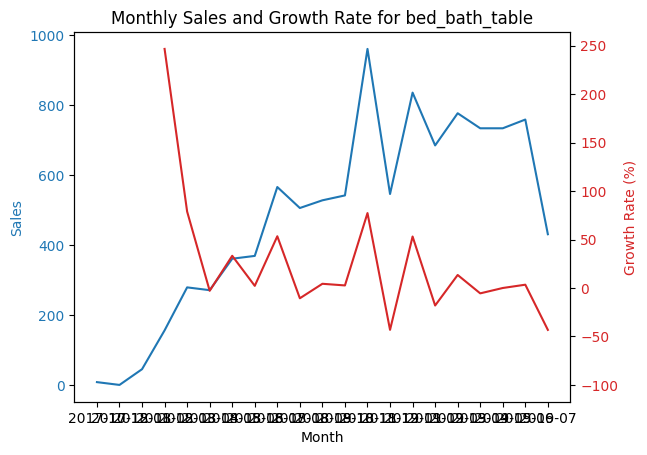

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (이 예제에서는 이미 데이터가 적절히 로드되어 있고, 'monthly_sales'와 'monthly_growth_rate'라는 이름으로 사용 가능하다고 가정)
# monthly_sales, monthly_growth_rate = load_your_data()

# 카테고리 선택, 예: 'bed_bath_table'
category = 'bed_bath_table'
sales_data = monthly_sales.loc[category]
growth_data = monthly_growth_rate.loc[category]

# 시각화를 위한 데이터 준비
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color=color)
ax1.plot(sales_data.index.astype(str), sales_data, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Y축을 공유하지 않는 두 번째 Y축 생성
color = 'tab:red'
ax2.set_ylabel('Growth Rate (%)', color=color)
ax2.plot(growth_data.index.astype(str), growth_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 제목 추가
plt.title('Monthly Sales and Growth Rate for ' + category)

# 그래프 표시
plt.show()


2018년 1월에는 판매량이 급격히 상승했고, 그 후 몇 달 간 판매량이 높은 수준을 유지했다. 그러나 2018년 5월 이후로는 판매량에 하락세를 보인다

성장률이 매우 불안정하며 큰 폭으로 변동하는 것을 볼 수 있다. 성장률은 2018년 초반에는 매우 높았지만, 이후 몇 개월 동안 감소하거나 심지어 마이너스 성장률을 보인 시기도 있다.

종합적으로 2018년 5월까지는 매출 성장을 이루었지만 그 이후로는 하락세를 겪는다는것을 알수있다.

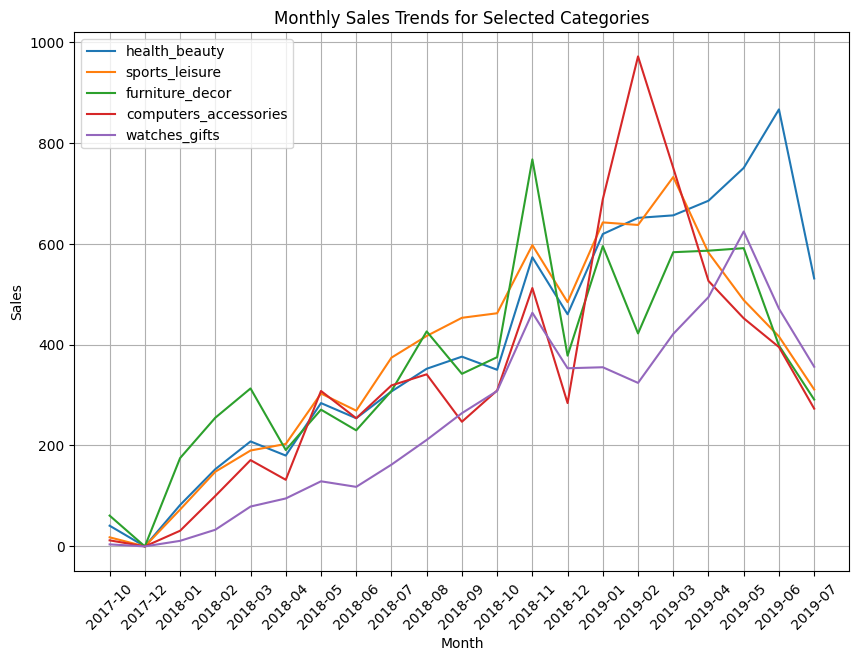

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 (이 예제에서는 이미 데이터가 적절히 로드되어 있고, 'monthly_sales'라는 이름으로 사용 가능하다고 가정)
# monthly_sales = load_your_data()

# 분석할 카테고리 선택
categories = ['health_beauty', 'sports_leisure', 'furniture_decor', 'computers_accessories', 'watches_gifts']

# 데이터 프레임 준비
fig, ax = plt.subplots(figsize=(10, 7))

for category in categories:
    category_data = monthly_sales.loc[category]
    ax.plot(category_data.index.astype(str), category_data, label=category)

# 레전드 추가
ax.legend()

# X축 라벨 회전
plt.xticks(rotation=45)

# 축 라벨 설정
ax.set_xlabel('Month')
ax.set_ylabel('Sales')

# 그래프 제목 추가
plt.title('Monthly Sales Trends for Selected Categories')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


카테고리 중 watches_gifts 와 healtghy_beauty는 점진적인 매출 성장을 이루고 있다.

반면에 computer accessories 와 furniture_decor, sports_leisure는 2019년에 들어서 매출이 하락중에 있다.

      Review_id     Order_id  Review_score Review_creation_date  \
0  REVIEW_00000  ORDER_01674             4  2019-01-18 00:00:00   
1  REVIEW_00000  ORDER_01674             4  2019-01-18 00:00:00   
2  REVIEW_00001  ORDER_80140             5  2019-03-10 00:00:00   
3  REVIEW_00002  ORDER_69816             5  2019-02-17 00:00:00   
4  REVIEW_00003  ORDER_24398             5  2018-04-21 00:00:00   

  Review_answer_timestamp  Order_item_id     Product_id    Seller_id   Price  \
0     2019-01-18 21:46:59            1.0  PRODUCT_21853  SELLER_0286  185.00   
1     2019-01-18 21:46:59            2.0  PRODUCT_21853  SELLER_0286  185.00   
2     2019-03-11 03:05:13            1.0  PRODUCT_18124  SELLER_0262   79.79   
3     2019-02-18 14:36:24            1.0  PRODUCT_07372  SELLER_2445  149.00   
4     2018-04-21 22:02:06            1.0  PRODUCT_22159  SELLER_2445  179.99   

   Freight_value  Product_category_name Product_weight_g Product_length_cm  \
0          13.63         sports_leisur

C:\Users\82106\AppData\Local\Temp\ipykernel_25096\228506136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_combined_df, x='Review_score', palette='viridis')


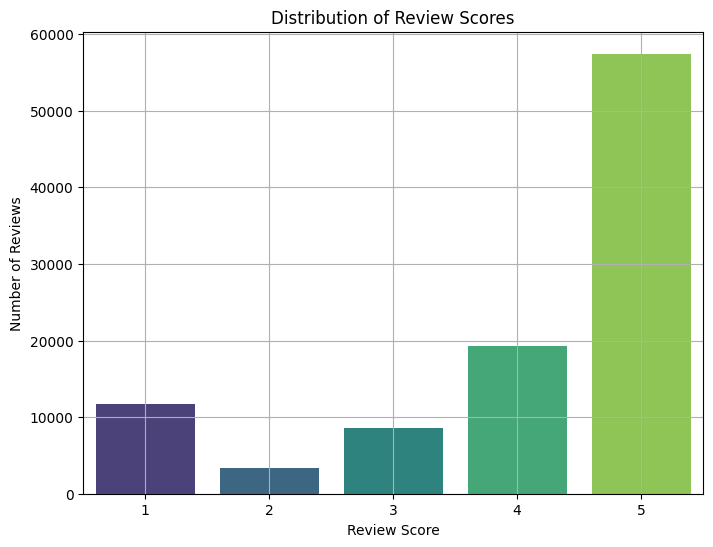

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reviews_df와 order_items_df 결합
combined_df_1 = pd.merge(reviews_df, order_items_df, on='Order_id', how='left')

# combined_df_1과 products_df 결합
final_combined_df = pd.merge(combined_df_1, products_df, on='Product_id', how='left')

# 데이터 개요 확인
print(final_combined_df.head())
print(final_combined_df.info())

# 평균 리뷰 점수 계산
average_score = final_combined_df['Review_score'].mean()
print(f"Average Review Score: {average_score:.2f}")

# 리뷰 점수 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=final_combined_df, x='Review_score', palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


5점 이 가장많고 그다음 4점 1점 순이다.

Product_category_name
fashion_childrens_clothes        5.000000
musical_cds_dvds                 4.642857
imported_books                   4.555556
books_general_interest           4.540984
portable_home_oven_and_coffee    4.440000
                                   ...   
home_comfort_2                   3.615385
party_supplies                   3.607143
office_furniture                 3.508582
diapers_hygiene                  3.242424
insurance_and_services           2.500000
Name: Review_score, Length: 72, dtype: float64


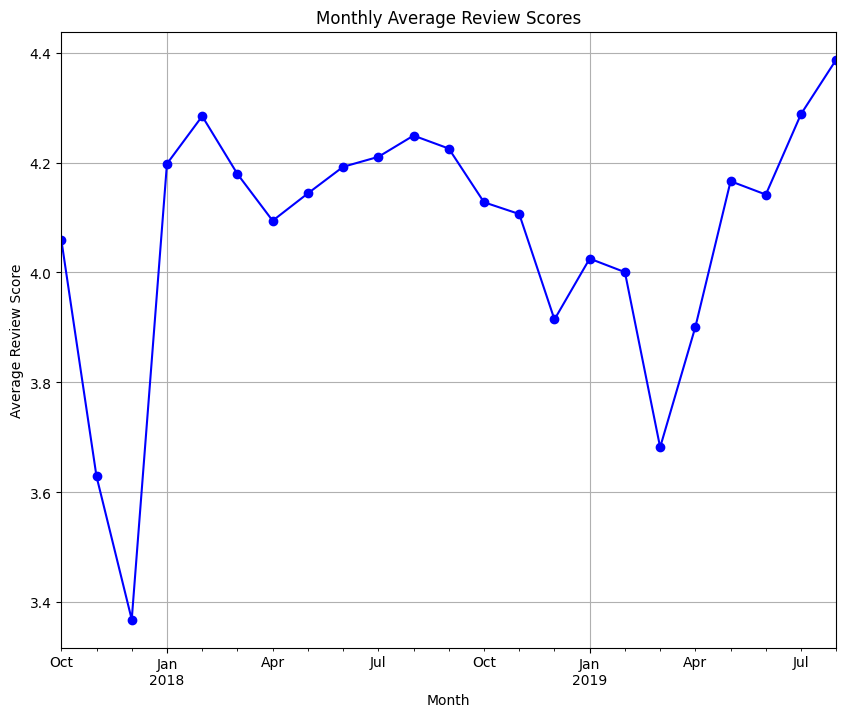

In [49]:
# 카테고리별 평균 리뷰 점수 계산
category_scores = final_combined_df.groupby('Product_category_name')['Review_score'].mean()
print(category_scores.sort_values(ascending=False))

# 시간별 리뷰 점수 변화 분석
# 'Review_creation_date'를 datetime으로 변환
final_combined_df['Review_creation_date'] = pd.to_datetime(final_combined_df['Review_creation_date'])
final_combined_df['Year_Month'] = final_combined_df['Review_creation_date'].dt.to_period('M')

# 월별 평균 리뷰 점수 계산
monthly_scores = final_combined_df.groupby('Year_Month')['Review_score'].mean()

# 월별 평균 리뷰 점수 시각화
plt.figure(figsize=(10, 8))
monthly_scores.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Monthly Average Review Scores')
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.show()


리뷰는 2019년 초반까지 낮은 점수를 받았지만, 이 후에는 점차 상승하는 추세를 보이고 있다. 

특히 2017년 10월 부터 리뷰점수에 급격한 하락이 있었고, 이후 3점초반에서 4.2까지 급격한 상승이 있었다.

전에 카테고리별 매출 성장률 추이와 비교하였을때 리뷰 점수와 매출 성장률은 다르게 흘러가는 것을 확인할 수 있다. 

이를 통해 리뷰 점수가 매출 성장률에 직접적인 영향을 미치지는 않는다는 것을 알 수 있다.

### 전체 품목 매출 추이 분석

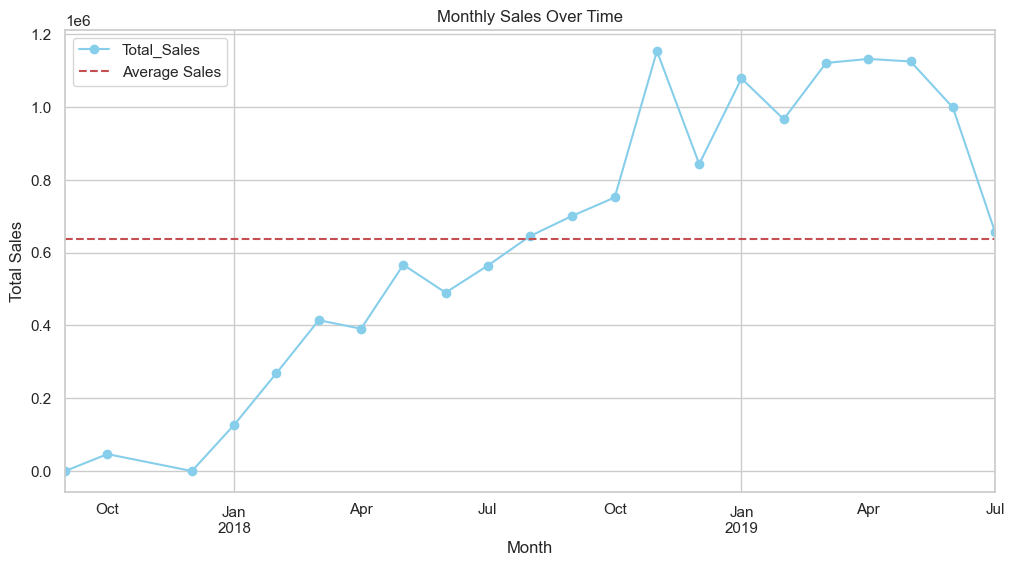

In [39]:
import pandas as pd
import matplotlib.pyplot as plt



# orders_df와 order_items_df 결합
combined_sales_df = pd.merge(orders_df, order_items_df, on='Order_id', how='left')

# 'Order_purchase_timestamp'를 datetime 형식으로 변환
combined_sales_df['Order_purchase_timestamp'] = pd.to_datetime(combined_sales_df['Order_purchase_timestamp'])
combined_sales_df['Year_Month'] = combined_sales_df['Order_purchase_timestamp'].dt.to_period('M')

# 월별 매출 계산 (제품 가격과 운임을 합산)
combined_sales_df['Total_Sales'] = combined_sales_df['Price'] + combined_sales_df['Freight_value']
monthly_sales = combined_sales_df.groupby('Year_Month')['Total_Sales'].sum()

# 월별 매출 평균 계산
monthly_average_sales = monthly_sales.mean()

# 월별 매출 시각화
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.axhline(y=monthly_average_sales, color='r', linestyle='--', label='Average Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


전체 상품의 매출 추이이다. 이를 살펴보았을때 2019년 4월까지는 상승을하다가 그 이후로는 하락세인것을 볼수있다. 이 그래프를 보았을때 전체적인 비즈니스 에 새로운 변화가 필요해보인다.

### 전체 매출 성장률과 리뷰 점수 변화 비교 

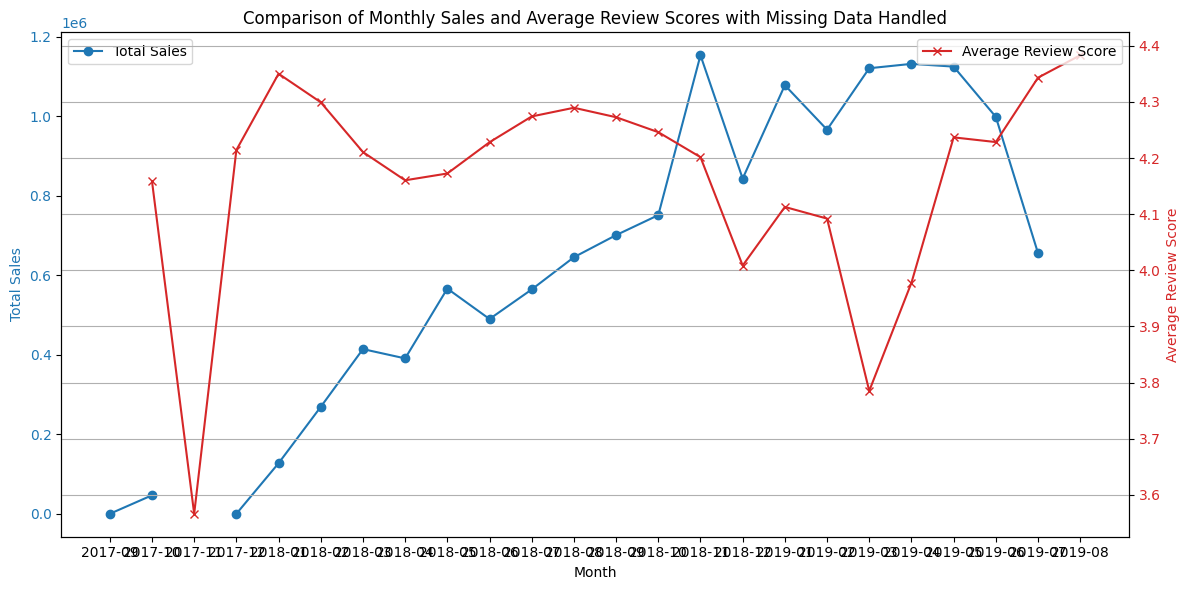

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 가정: monthly_sales와 monthly_review_scores는 이미 계산된 상태입니다.

# 누락된 데이터를 NaN으로 설정하기 위한 함수 정의
def fill_missing_months(series):
    all_months = pd.period_range(series.index.min(), series.index.max(), freq='M')
    return series.reindex(all_months, fill_value=np.NaN)

# 누락된 데이터 처리
monthly_sales_filled = fill_missing_months(monthly_sales)
monthly_review_scores_filled = fill_missing_months(monthly_review_scores)

# 데이터 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 매출 그래프
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(monthly_sales_filled.index.astype(str), monthly_sales_filled, color=color, marker='o', linestyle='-', label='Total Sales')
ax1.tick_params(axis='y', labelcolor=color)

# 평균 리뷰 점수 그래프
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Review Score', color=color)
ax2.plot(monthly_review_scores_filled.index.astype(str), monthly_review_scores_filled, color=color, marker='x', linestyle='-', label='Average Review Score')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 그리드 설정
plt.title('Comparison of Monthly Sales and Average Review Scores with Missing Data Handled')
fig.tight_layout()  
plt.grid(True)

# 범례 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

리뷰 점수 와 매출 추이는 크게 상관관계가 없는것으로 보인다.

그러므로 리뷰 점수보다는 매출 성장률에 좀더 집중하는것이 좋아보인다. 

특히나 카테고리별 매출성장률을 살펴보고 각 카테고리별 전략을 수립할수있다.

# 2.가치 기반 고객 세분화 (LTV 기반)

### 고객의 구매 이력을 분석하여 장기간 동안 가장 많은 수익을 창출할 가능성이 있는 고객 그룹을 식별

In [21]:
# 고객과 주문 데이터 결합
customer_orders_df = pd.merge(customers_df, orders_df, on='Customer_id', how='inner')

# 주문 아이템 데이터 결합
customer_orders_items_df = pd.merge(customer_orders_df, order_items_df, on='Order_id', how='inner')

# 결제 데이터 결합
full_customer_history_df = pd.merge(customer_orders_items_df, payments_df, on='Order_id', how='inner')


In [22]:
import pandas as pd
import numpy as np
from datetime import datetime


# 날짜 데이터를 datetime 형식으로 변환
full_customer_history_df['Order_purchase_timestamp'] = pd.to_datetime(full_customer_history_df['Order_purchase_timestamp'])

# 고객별 주문 데이터 집계
customer_agg = full_customer_history_df.groupby('Customer_unique_id').agg({
    'Order_purchase_timestamp': ['min', 'max', 'count'],
    'Payment_value': 'sum'
})

# 새로운 컬럼 이름 설정
customer_agg.columns = ['First_purchase', 'Last_purchase', 'Total_orders', 'Total_spent']

# 평균 주문 가치 계산
customer_agg['Average_order_value'] = customer_agg['Total_spent'] / customer_agg['Total_orders']

# 고객 유지 기간 계산 (단위: 일)
customer_agg['Customer_lifetime'] = (customer_agg['Last_purchase'] - customer_agg['First_purchase']).dt.days + 1

# 연간 구매 횟수 계산
customer_agg['Annual_purchase_rate'] = customer_agg['Total_orders'] / (customer_agg['Customer_lifetime'] / 365.25)

# 평균 고객 유지 기간 추정 (이 부분은 비즈니스 모델과 데이터에 따라 조정될 수 있음)
average_customer_lifetime = customer_agg['Customer_lifetime'].mean()

# LTV 계산
customer_agg['LTV'] = customer_agg['Average_order_value'] * customer_agg['Annual_purchase_rate'] * average_customer_lifetime

# 결과 확인
print(customer_agg[['Average_order_value', 'Annual_purchase_rate', 'LTV']].head())


                       Average_order_value  Annual_purchase_rate  \
Customer_unique_id                                                 
CUSTOMER_Unique_00000               146.87            365.250000   
CUSTOMER_Unique_00001               335.48            365.250000   
CUSTOMER_Unique_00002               157.73            365.250000   
CUSTOMER_Unique_00003               173.30            365.250000   
CUSTOMER_Unique_00004               282.94             23.564516   

                                 LTV  
Customer_unique_id                    
CUSTOMER_Unique_00000  184859.087452  
CUSTOMER_Unique_00001  422254.556128  
CUSTOMER_Unique_00002  198528.112370  
CUSTOMER_Unique_00003  218125.416051  
CUSTOMER_Unique_00004   22975.785127  


In [25]:
from sklearn.cluster import KMeans
import numpy as np

# 고객 데이터에 대한 클러스터링 준비
features = customer_agg[['Average_order_value', 'Annual_purchase_rate', 'Customer_lifetime']].fillna(0)
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

# 클러스터 레이블 추가
customer_agg['Cluster'] = kmeans.labels_

# 클러스터 결과 확인
print(customer_agg['Cluster'].value_counts())



Cluster
0    81142
2     2692
1     1277
Name: count, dtype: int64


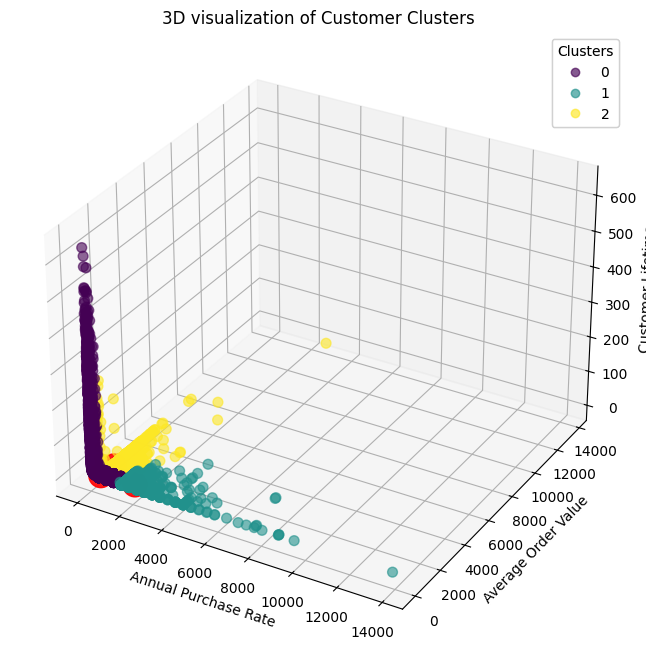

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# 3D 시각화 준비
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터링 결과 시각화
scatter = ax.scatter(customer_agg['Annual_purchase_rate'],
                     customer_agg['Average_order_value'],
                     customer_agg['Customer_lifetime'],
                     c=customer_agg['Cluster'], s=50, cmap='viridis', alpha=0.6, label=customer_agg['Cluster'])

# 클러스터 중심점 추가
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 1], centers[:, 0], centers[:, 2], c='red', s=300, alpha=0.9, marker='o')

# 축 레이블과 타이틀 설정
ax.set_xlabel('Annual Purchase Rate')
ax.set_ylabel('Average Order Value')
ax.set_zlabel('Customer Lifetime')
ax.set_title('3D visualization of Customer Clusters')

# 범례 추가
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# 그리드 추가
ax.grid(True)

plt.show()


In [26]:
# 클러스터별 기본 통계 요약
cluster_summary = customer_agg.groupby('Cluster').agg({
    'Average_order_value': ['mean', 'median', 'std'],
    'Annual_purchase_rate': ['mean', 'median', 'std'],
    'Customer_lifetime': ['mean', 'median', 'std'],
    'LTV': ['mean', 'median', 'std']
}).reset_index()

print(cluster_summary)

  Cluster Average_order_value                      Annual_purchase_rate  \
                         mean   median         std                 mean   
0       0          127.099420   99.800   96.056067           406.726603   
1       1          287.572803  192.150  328.610893          1931.201712   
2       2         1013.233106  816.165  617.335239           436.935307   

                       Customer_lifetime                             LTV  \
    median         std              mean median        std          mean   
0   365.25  150.388062          3.532215    1.0  23.875967  1.831180e+05   
1  1461.00  960.701040          1.014879    1.0   0.352685  1.993100e+06   
2   365.25  211.125705          2.001114    1.0  12.134741  1.607006e+06   

                               
         median           std  
0  1.301704e+05  1.788917e+05  
1  1.082345e+06  3.569180e+06  
2  1.116788e+06  3.157494e+06  


In [31]:
# Customer_unique_id가 인덱스로 설정된 경우, 일반 열로 다시 설정
customer_agg.reset_index(inplace=True)

In [32]:
# 클러스터별 제품 카테고리 선호도 분석
# full_customer_history_df와 products_df를 결합해야 합니다. 예시 데이터 로드 및 조인 코드는 생략합니다.
product_preferences = pd.merge(full_customer_history_df, products_df, on='Product_id')
product_preferences = pd.merge(product_preferences, customer_agg[['Customer_unique_id', 'Cluster']], on='Customer_unique_id')

# 클러스터별 가장 인기 있는 상위 3개 카테고리
top_categories_per_cluster = product_preferences.groupby(['Cluster', 'Product_category_name']).size().reset_index(name='Count')
top_categories_per_cluster = top_categories_per_cluster.sort_values(['Cluster', 'Count'], ascending=[True, False]).groupby('Cluster').head(3)

print(top_categories_per_cluster)

     Cluster  Product_category_name  Count
8          0         bed_bath_table   9731
38         0          health_beauty   7993
64         0         sports_leisure   7559
103        1        furniture_decor    954
78         1         bed_bath_table    947
109        1         home_utilities    686
183        2          watches_gifts    441
141        2  computers_accessories    287
156        2          health_beauty    274


In [40]:
# customers_df에서 필요한 매핑 정보 추출 (Customer_id와 Customer_unique_id)
customer_id_map = customers_df[['Customer_id', 'Customer_unique_id']]

# orders_df와 customers_df를 Customer_id 기준으로 결합하여 Customer_unique_id 매핑
orders_with_customer_unique = pd.merge(orders_df, customer_id_map, on='Customer_id', how='inner')

# 이제 payments_df와 결합할 수 있도록 Order_id를 사용해 매핑
payments_with_customer = pd.merge(payments_df, orders_with_customer_unique[['Order_id', 'Customer_unique_id']], on='Order_id', how='inner')

# payments_with_customer와 customer_agg를 Customer_unique_id를 사용하여 결합
full_payment_data = pd.merge(payments_with_customer, customer_agg[['Customer_unique_id', 'Cluster']], on='Customer_unique_id', how='inner')

# 클러스터별 결제 방법 선호도 분석
payment_type_per_cluster = full_payment_data.groupby(['Cluster', 'Payment_type']).size().reset_index(name='Count')
payment_type_per_cluster = payment_type_per_cluster.sort_values(['Cluster', 'Count'], ascending=[True, False]).groupby('Cluster').head(3)

print(payment_type_per_cluster)


    Cluster Payment_type  Count
1         0  credit_card  64792
0         0       boleto  16910
3         0      voucher   3488
7         1      voucher   1632
5         1  credit_card   1024
4         1       boleto    250
9         2  credit_card   2284
8         2       boleto    439
11        2      voucher     25


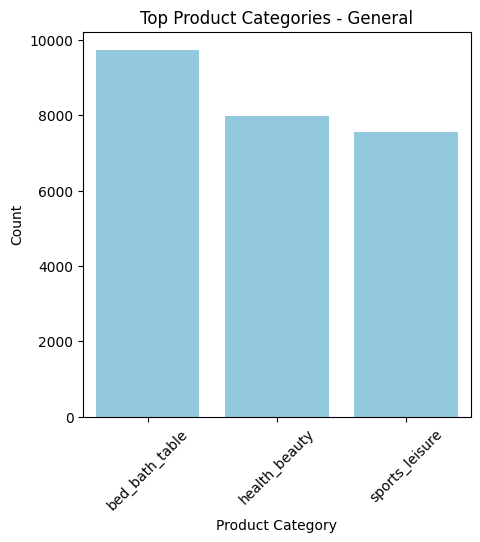

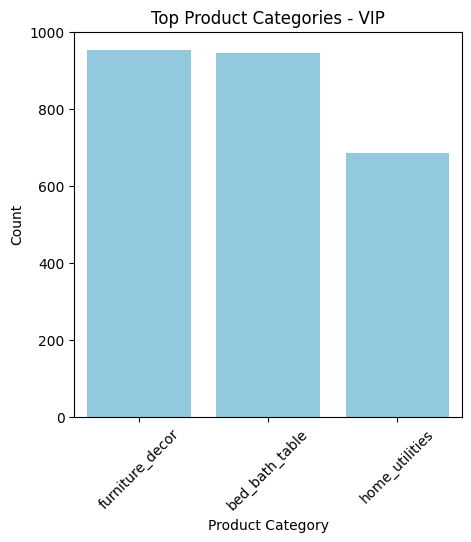

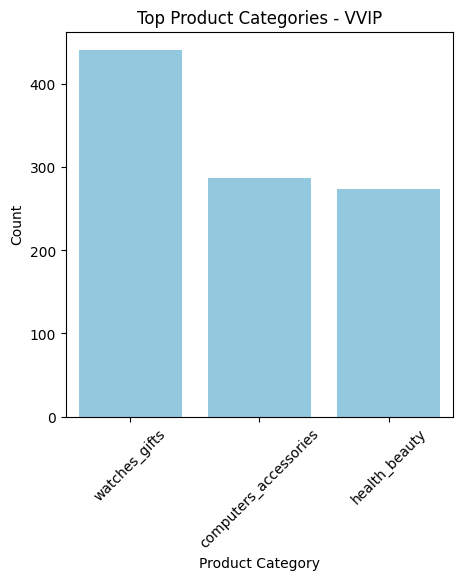

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = {
    'Cluster': [0, 0, 0, 1, 1, 1, 2, 2, 2],
    'Product_category_name': ['bed_bath_table', 'health_beauty', 'sports_leisure',
                              'furniture_decor', 'bed_bath_table', 'home_utilities',
                              'watches_gifts', 'computers_accessories', 'health_beauty'],
    'Count': [9731, 7993, 7559, 954, 947, 686, 441, 287, 274]
}

df = pd.DataFrame(data)

# 클러스터 이름 매핑
cluster_names = {0: 'General', 1: 'VIP', 2: 'VVIP'}
df['Cluster'] = df['Cluster'].map(cluster_names)

# 각 클러스터별로 그래프 생성
cluster_groups = df.groupby('Cluster')
for name, group in cluster_groups:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='Product_category_name', y='Count', data=group, color='skyblue')
    plt.title(f'Top Product Categories - {name}')
    plt.xlabel('Product Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



C:\Users\82106\AppData\Local\Temp\ipykernel_14376\1008188307.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment_type', y='Count', data=group, palette='viridis')


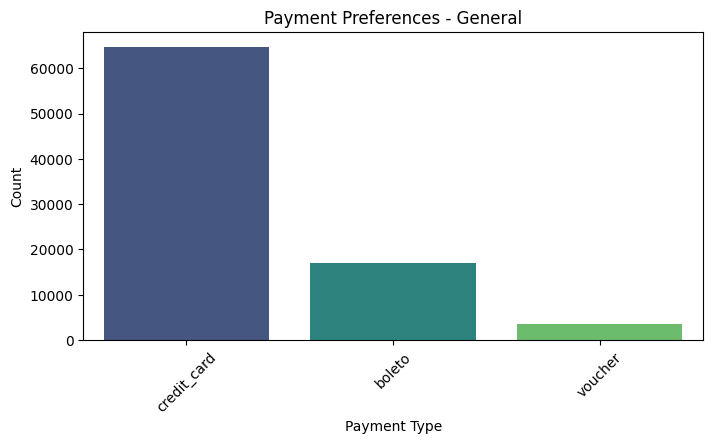

C:\Users\82106\AppData\Local\Temp\ipykernel_14376\1008188307.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment_type', y='Count', data=group, palette='viridis')


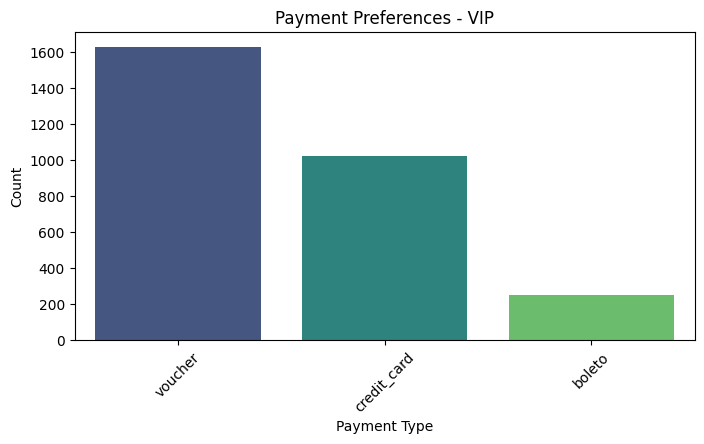

C:\Users\82106\AppData\Local\Temp\ipykernel_14376\1008188307.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment_type', y='Count', data=group, palette='viridis')


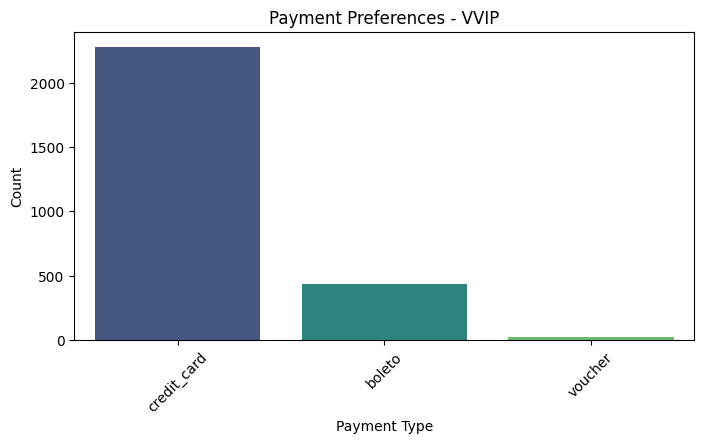

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = {
    'Cluster': [0, 0, 0, 1, 1, 1, 2, 2, 2],
    'Payment_type': ['credit_card', 'boleto', 'voucher', 'voucher', 'credit_card', 'boleto', 'credit_card', 'boleto', 'voucher'],
    'Count': [64792, 16910, 3488, 1632, 1024, 250, 2284, 439, 25]
}

df = pd.DataFrame(data)

# 클러스터 이름 매핑
cluster_names = {0: 'General', 1: 'VIP', 2: 'VVIP'}
df['Cluster'] = df['Cluster'].map(cluster_names)

# 각 클러스터별로 그래프 생성
cluster_groups = df.groupby('Cluster')
for name, group in cluster_groups:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Payment_type', y='Count', data=group, palette='viridis')
    plt.title(f'Payment Preferences - {name}')
    plt.xlabel('Payment Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


클러스터 0을 자주 구매하지만 작은 금액으로 구매하는 '일반 고객'

클러스터 1을 높은 구매 빈도와 중간 이상의 주문 가치를 'vip 고객'

클러스터 2를  구매 빈도는 중간 수준이지만, 각 구매에서 큰 금액을 지출하는 'vvip 고객'으로 정의할 수 있다.

### 클러스터별 선호 카테고리

일반고객 : 'bed_bath_table', 'health_beauty', 'sports_leisure'

vip 고객 : 'furniture_decor', 'bed_bath_table', 'home_utilities'

vvip 고객 : 'watches_gifts', 'computers_accessories', 'health_beauty'

### 클러스터별 결제 방법 선호도

일반고객 : 'credit_card', 'boleto', 'voucher'

vip 고객 : 'voucher', 'credit_card', 'boleto'

vvip 고객 : 'credit_card', 'boleto', 'voucher'



# 3.시장 포화도 및 경쟁 분석

In [2]:
import pandas as pd
import numpy as np

# 데이터 파일 로드
customers_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/customers.csv')
locations_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/locations.csv')
orders_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/orders.csv')
order_items_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/order_items.csv')
sellers_df = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/5.KPI 비즈니스 아이디어/open/sellers.csv')


In [3]:
# 결측치 확인 및 처리
customers_df.fillna(method='ffill', inplace=True)
sellers_df.fillna(method='ffill', inplace=True)
orders_df.fillna(method='ffill', inplace=True)
order_items_df.fillna(method='ffill', inplace=True)

C:\Users\82106\AppData\Local\Temp\ipykernel_9648\3456997430.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers_df.fillna(method='ffill', inplace=True)
C:\Users\82106\AppData\Local\Temp\ipykernel_9648\3456997430.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sellers_df.fillna(method='ffill', inplace=True)
C:\Users\82106\AppData\Local\Temp\ipykernel_9648\3456997430.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders_df.fillna(method='ffill', inplace=True)
C:\Users\82106\AppData\Local\Temp\ipykernel_9648\3456997430.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  order_items_df.fillna(method='ffill', i

In [5]:
#Order_purchase_timestamp 날짜형식으로 변환
orders_df['Order_purchase_timestamp'] = pd.to_datetime(orders_df['Order_purchase_timestamp'])

# 주문 날짜가 미래 날짜인 경우를 검출
future_dates = orders_df['Order_purchase_timestamp'] > pd.Timestamp('today')

# 이상치 확인
print("Future dates found:", orders_df[future_dates])

Future dates found: Empty DataFrame
Columns: [Order_id, Customer_id, Order_status, Order_purchase_timestamp, Order_delivered_carrier_date, Order_delivered_customer_date, Order_estimated_delivery_date]
Index: []


주문 날짜가 미래 날짜인 경우는 없다

In [6]:
# 주문과 고객 정보 통합
orders_customers_df = pd.merge(orders_df, customers_df, on='Customer_id', how='left')

# 주문 아이템과 판매자 정보 통합
order_items_sellers_df = pd.merge(order_items_df, sellers_df, on='Seller_id', how='left')

# 지역 정보 추가
seller_locations_df = pd.merge(sellers_df, locations_df, left_on='Seller_zipcode_prefix', right_on='Geolocation_zipcode_prefix', how='left')


In [14]:
# 주문과 주문 아이템 결합
orders_items_combined_df = pd.merge(orders_df, order_items_df, on='Order_id', how='left')

# 주문 아이템과 판매자 결합
orders_sellers_combined_df = pd.merge(orders_items_combined_df, sellers_df, on='Seller_id', how='left')

In [17]:
# 지역별 판매자 수 집계
seller_count_by_region = orders_sellers_combined_df.groupby(['Seller_city', 'Seller_state'])['Seller_id'].nunique().reset_index(name='Num_Sellers')


In [18]:
seller_count_by_region

,Seller_city,Seller_state,Num_Sellers
0,abadia de goias,GO,1
1,afonso claudio,ES,1
2,aguas claras df,SP,1
3,alambari,SP,1
4,alfenas,MG,1
...,...,...,...
588,volta redonda,SP,1
589,votorantim,SP,4
590,votuporanga,SP,4
591,xanxere,SC,2


In [20]:
# 지역별 주문 수 및 매출 집계
sales_data_by_region = orders_sellers_combined_df.groupby(['Seller_city', 'Seller_state']).agg({
    'Order_id': 'count',
    'Price': 'sum'
}).rename(columns={'Order_id': 'Num_Orders', 'Price': 'Total_Revenue'}).reset_index()


In [21]:
sales_data_by_region

,Seller_city,Seller_state,Num_Orders,Total_Revenue
0,abadia de goias,GO,1,142.47
1,afonso claudio,ES,6,293.99
2,aguas claras df,SP,1,35.00
3,alambari,SP,5,138.60
4,alfenas,MG,61,5453.07
...,...,...,...,...
588,volta redonda,SP,145,11639.13
589,votorantim,SP,250,18992.74
590,votuporanga,SP,132,19997.68
591,xanxere,SC,7,1947.15


In [22]:
# 판매자별 제품 포트폴리오 분석 (제품 수)
product_portfolio = orders_sellers_combined_df.groupby(['Seller_id']).agg({
    'Product_id': 'nunique'
}).rename(columns={'Product_id': 'Num_Products'}).reset_index()

In [23]:
product_portfolio

,Seller_id,Num_Products
0,SELLER_0000,3
1,SELLER_0001,30
2,SELLER_0002,1
3,SELLER_0003,1
4,SELLER_0004,30
...,...,...
2756,SELLER_2758,1
2757,SELLER_2759,4
2758,SELLER_2760,4
2759,SELLER_2761,1


In [24]:
# 지역별 평균 가격 및 운송비 분석
average_price_freight_by_region = orders_sellers_combined_df.groupby(['Seller_city', 'Seller_state']).agg({
    'Price': 'mean',
    'Freight_value': 'mean'
}).rename(columns={'Price': 'Average_Price', 'Freight_value': 'Average_Freight'}).reset_index()


In [25]:
average_price_freight_by_region

,Seller_city,Seller_state,Average_Price,Average_Freight
0,abadia de goias,GO,142.470000,43.410000
1,afonso claudio,ES,48.998333,19.878333
2,aguas claras df,SP,35.000000,17.780000
3,alambari,SP,27.720000,16.230000
4,alfenas,MG,89.394590,24.532623
...,...,...,...,...
588,volta redonda,SP,80.269862,19.428276
589,votorantim,SP,75.970960,18.430880
590,votuporanga,SP,151.497576,22.368182
591,xanxere,SC,278.164286,20.688571


In [26]:
# 데이터 출력
print(seller_count_by_region.head())
print(sales_data_by_region.head())
print(product_portfolio.head())
print(average_price_freight_by_region.head())

       Seller_city Seller_state  Num_Sellers
0  abadia de goias           GO            1
1   afonso claudio           ES            1
2  aguas claras df           SP            1
3         alambari           SP            1
4          alfenas           MG            1
       Seller_city Seller_state  Num_Orders  Total_Revenue
0  abadia de goias           GO           1         142.47
1   afonso claudio           ES           6         293.99
2  aguas claras df           SP           1          35.00
3         alambari           SP           5         138.60
4          alfenas           MG          61        5453.07
     Seller_id  Num_Products
0  SELLER_0000             3
1  SELLER_0001            30
2  SELLER_0002             1
3  SELLER_0003             1
4  SELLER_0004            30
       Seller_city Seller_state  Average_Price  Average_Freight
0  abadia de goias           GO     142.470000        43.410000
1   afonso claudio           ES      48.998333        19.878333
2  aguas c

### 시각화

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")


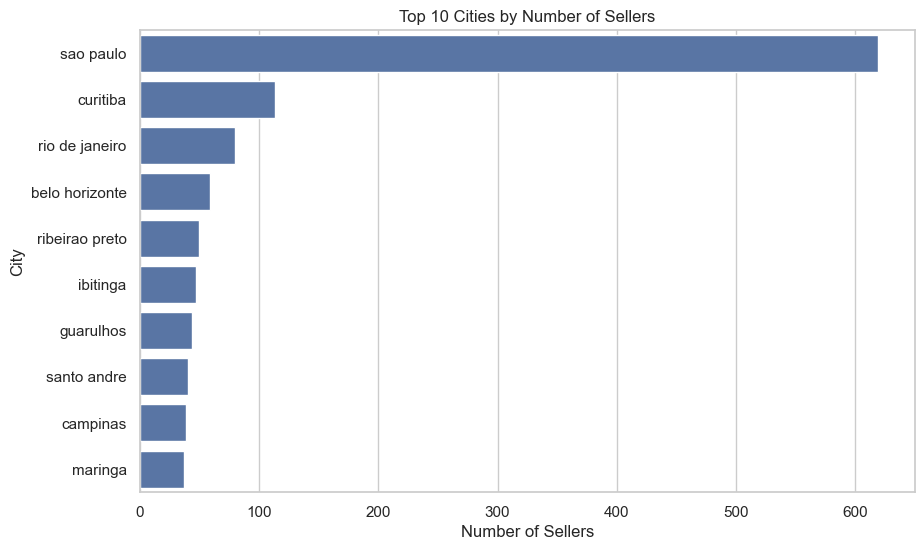

In [28]:
# 지역별 판매자 수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Num_Sellers', y='Seller_city', data=seller_count_by_region.sort_values(by='Num_Sellers', ascending=False).head(10))
plt.title('Top 10 Cities by Number of Sellers')
plt.xlabel('Number of Sellers')
plt.ylabel('City')
plt.show()


지역별 판매자수와 고객수를 비교하여 현재 추가적인 판매자가 필요한 지역을 식별한다

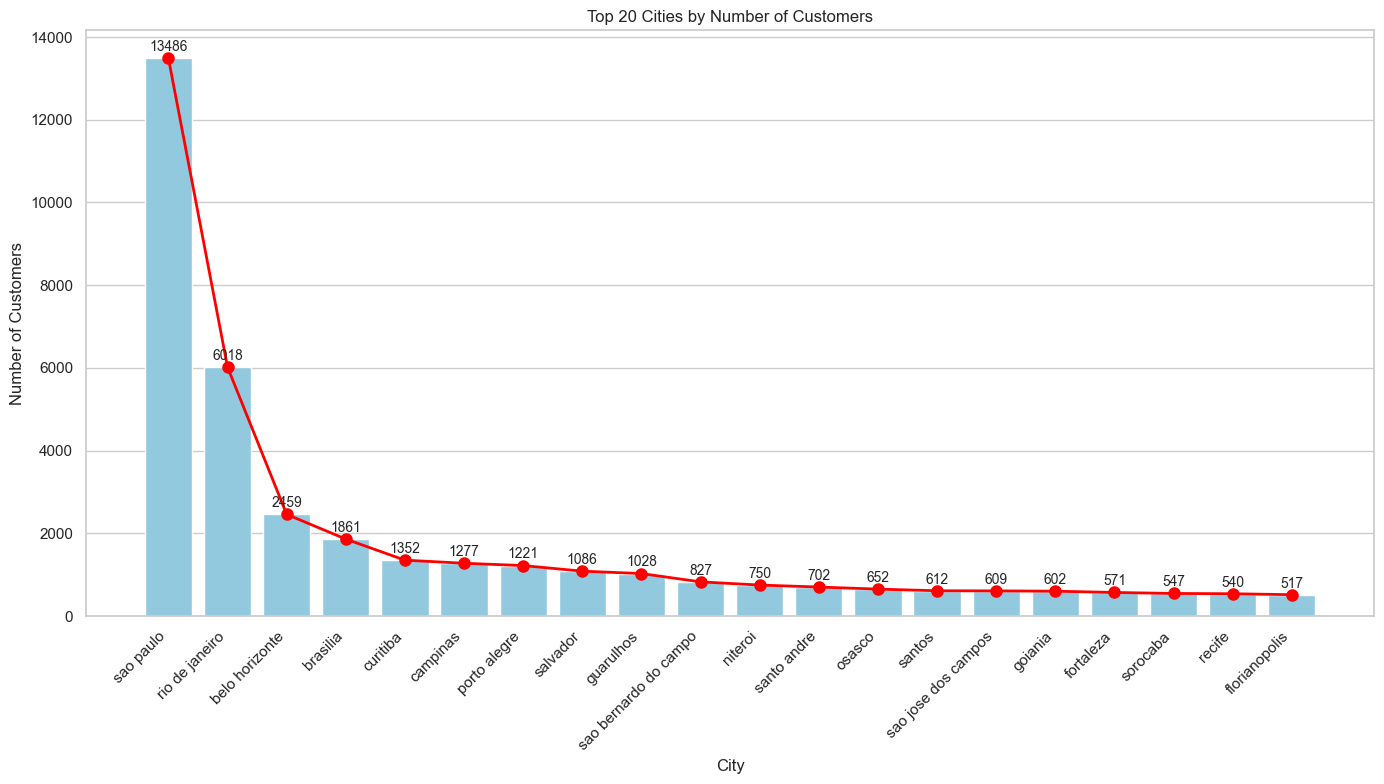

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Customer_city'의 상위 20개 도시의 고객 수 계산
top_cities = customers_df['Customer_city'].value_counts().head(20)

# 막대그래프로 시각화
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=top_cities.index, y=top_cities.values, color='skyblue')

# 각 막대 위에 빈도수 표시
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10, xytext = (0, 8), 
                   textcoords = 'offset points')

# 선 그래프 추가
plt.plot(top_cities.values, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)

plt.title('Top 20 Cities by Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.tight_layout()  # 그래프 간격 조정
plt.show()

### 판매자수 와 고객수를 비교

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 고객 데이터에서 상위 20개 도시의 고객 수 계산
top_cities_customers = customers_df['Customer_city'].value_counts().head(20)

# 판매자 데이터에서 상위 20개 도시의 판매자 수 계산
top_cities_sellers = sellers_df[sellers_df['Seller_city'].isin(top_cities_customers.index)]
top_cities_sellers_count = top_cities_sellers['Seller_city'].value_counts()

# 데이터 프레임 생성
comparison_df = pd.DataFrame({
    'Num_Customers': top_cities_customers,
    'Num_Sellers': top_cities_sellers_count
}).fillna(0)  # 판매자 데이터가 없는 도시는 0으로 채우기

comparison_df.sort_values(by='Num_Customers', ascending=False, inplace=True)


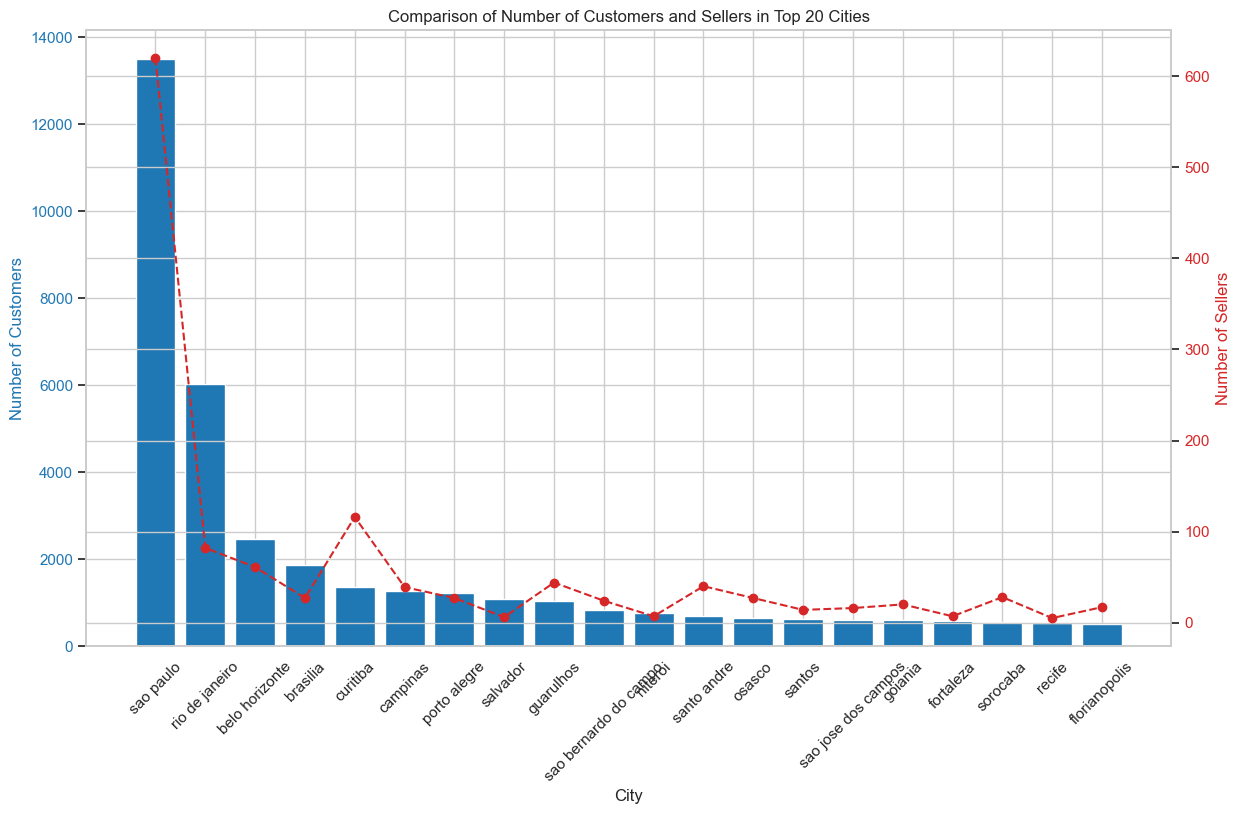

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 막대 그래프 생성을 위한 플롯
fig, ax1 = plt.subplots(figsize=(14, 8))

# 고객 수에 대한 막대 그래프
color = 'tab:blue'
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Customers', color=color)
ax1.bar(comparison_df.index, comparison_df['Num_Customers'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# 판매자 수에 대한 막대 그래프 (새로운 축 생성)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Sellers', color=color)
ax2.plot(comparison_df.index, comparison_df['Num_Sellers'], color=color, marker='o', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 설정
plt.title('Comparison of Number of Customers and Sellers in Top 20 Cities')
plt.show()



sao paulo는 소비자수가 많은만큼 판매자수도 많은것을 볼수있다. 반면에 rio de janeiro는 소비자수는 많지만 판매자수는 적은것을 볼수있다. 이는 판매자수가 적은만큼 경쟁이 적어지고 판매자들이 더 많은 이익을 얻을수있다는것을 의미한다.

또한 belo horizonte도 판매자가수가 더적은것을 볼수있다.

반면에 curitiba는 소비자수는 적지만 판매자수는 많은것을 볼수있다. 이는 경쟁이 많아지고 이 지역이 경쟁 포화상태라는것을 의마한다.

기업에서는 판매자 수와 소비자수를 데이터 분석을 통해 알맞게 조정할 필요가 있는 부분이다.